In [ ]:
from sklearn.datasets import load_wine
data_set = load_wine()
target = data_set.target
data = data_set.data
print(data_set.feature_names)
print(data_set.target_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
['class_0' 'class_1' 'class_2']


In [ ]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np

# n_clusters = ?

clustering = AgglomerativeClustering().fit(data)
clustering
clustering.labels_

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

# Custom GridSearch

In [ ]:
def Clustering_GridSearch(estimator, param_grid, scoring, data):
  scores_and_params = [] # pairs of score to params (params ::= dict)
  #keys_count = len(param_grid)
  #for param_key_index in range(keys_count):
  #  values =
  for n_clusters_value in param_grid['n_clusters']:
    for linkage_value in param_grid['linkage']:
      step_estimator = estimator(n_clusters = n_clusters_value, linkage=linkage_value)
      step_estimator.fit(data)
      step_score = scoring(data, step_estimator.labels_)
      score = (step_score, step_estimator)
      scores_and_params.append(score)
  return scores_and_params

In [ ]:
from sklearn.metrics import silhouette_score

max_clusters = len(data)

params = {
    'n_clusters': range(2, max_clusters),
    'linkage': ['ward', 'average', 'complete', 'single']
}

clustering_gs_result = Clustering_GridSearch(
    estimator = AgglomerativeClustering,
    param_grid = params,
    scoring = silhouette_score,
    data = data
)

In [ ]:
clustering_gs_result

[(0.6587292996216912, AgglomerativeClustering()),
 (0.6587292996216912, AgglomerativeClustering(linkage='average')),
 (0.6413290429696277, AgglomerativeClustering(linkage='complete')),
 (0.5393938960075034, AgglomerativeClustering(linkage='single')),
 (0.5644796401732068, AgglomerativeClustering(n_clusters=3)),
 (0.6100753288756406,
  AgglomerativeClustering(linkage='average', n_clusters=3)),
 (0.5418973703348594,
  AgglomerativeClustering(linkage='complete', n_clusters=3)),
 (0.48798203351890634,
  AgglomerativeClustering(linkage='single', n_clusters=3)),
 (0.560672694839426, AgglomerativeClustering(n_clusters=4)),
 (0.5296420123584578,
  AgglomerativeClustering(linkage='average', n_clusters=4)),
 (0.5336008843702889,
  AgglomerativeClustering(linkage='complete', n_clusters=4)),
 (0.3935000405984129, AgglomerativeClustering(linkage='single', n_clusters=4)),
 (0.5074843044233786, AgglomerativeClustering(n_clusters=5)),
 (0.5458165663010807,
  AgglomerativeClustering(linkage='average', 

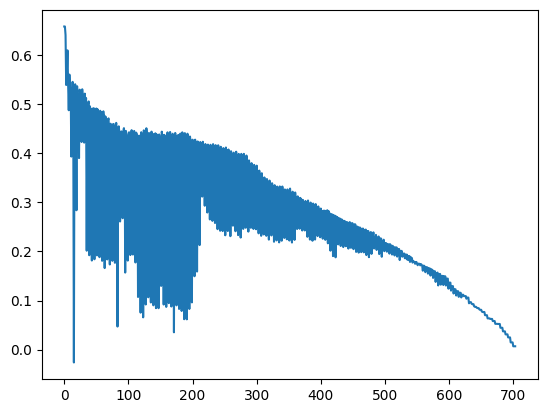

In [ ]:
import matplotlib.pyplot as plt

optimization_results = [pair[0] for pair in clustering_gs_result]

plt.plot(list(range(len(optimization_results))), optimization_results)
plt.show()

In [ ]:
optimization_results_sort = sorted(clustering_gs_result, key=lambda gs: gs[0])
best_estimator = optimization_results_sort[-1][1]

print(best_estimator.n_clusters_)
print(best_estimator.linkage)


2
average


In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
from matplotlib import pyplot as plt

In [ ]:
linkage(data, method='average')

dendorogramma = linkage(data, method='average')

In [ ]:
cutree = cut_tree(dendorogramma, n_clusters=2 )

In [ ]:
cutree

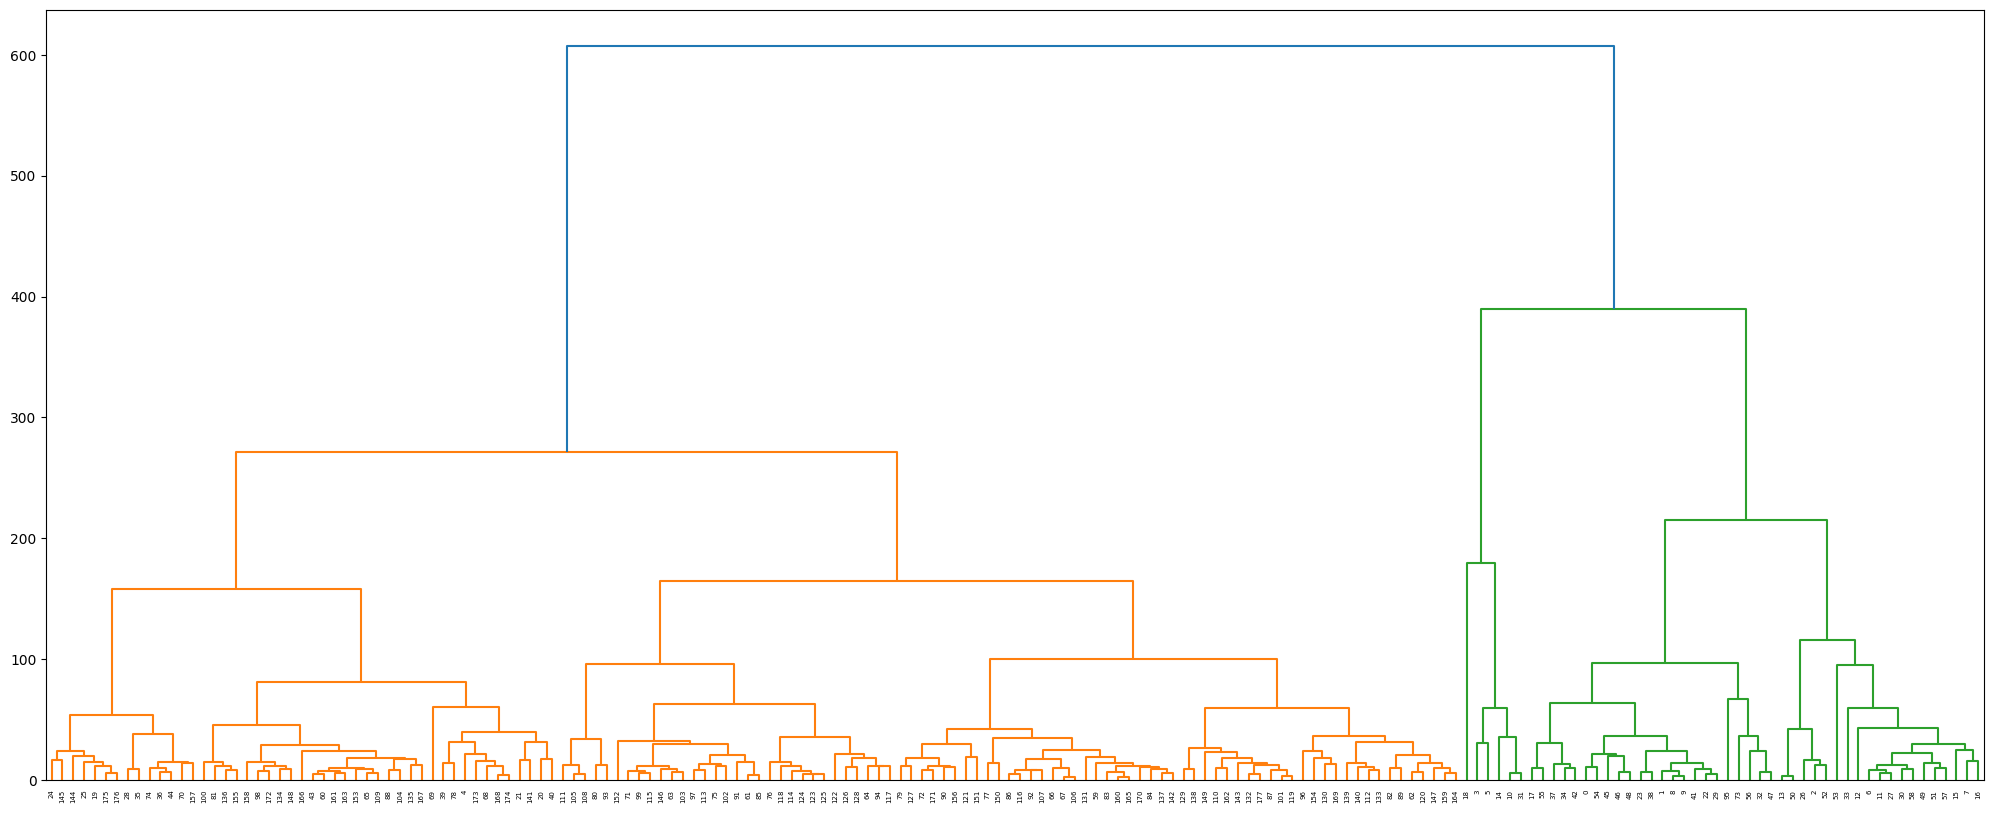

In [ ]:

fig = plt.figure(figsize=(25, 10))
dn = dendrogram(dendorogramma)
plt.show()